In [1]:
%matplotlib inline
import sys
import numpy as np
import cv2
from IPython.display import Image, display
from ipywidgets import widgets
from matplotlib import pyplot as plt

print("python version:", sys.version)
print("numpy version:", np.__version__)
print("opencv version:", cv2.__version__) # type: ignore

python version: 3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]
numpy version: 1.25.0
opencv version: 4.8.0


In [2]:
def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。
    """
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))

def houghline(img, rho, theta, threshold, min_line_len, max_line_gap):
    """ハフ変換で直線検出を行い、結果を表示する。
    """
    # グレースケールに変換する。
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Canny 法で2値化する。
    edges = cv2.Canny(gray, 150, 300, L2gradient=True)
    # ハフ変換で直線検出する。
    lines = cv2.HoughLinesP(
        edges,
        rho,
        np.radians(theta),
        threshold,
        minLineLength=min_line_len,
        maxLineGap=max_line_gap,
    )
    # 検出した直線を描画する。
    dst = img.copy()

    if lines is not None:
        for x1, y1, x2, y2 in lines.squeeze(axis=1):
            cv2.line(dst, (x1, y1), (x2, y2), (0, 0, 255), 2)
    imshow(dst)

img.shape= (271, 435, 3) img.dtype= uint8
gray.shape= (271, 435) gray.dtype= uint8
edges.shape= (271, 435) edges.dtype= uint8 edges.max= 255 edges.min= 0


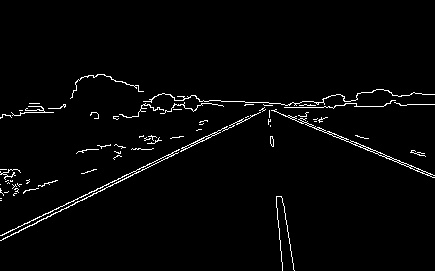

In [3]:
# 画像を読み込む。
img:np.ndarray = cv2.imread("sample1.jpg")
print("img.shape=", img.shape, "img.dtype=", img.dtype)

# グレースケールに変換する。
gray:np.ndarray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("gray.shape=", gray.shape, "gray.dtype=", gray.dtype)

# Canny 法で2値化する。
edges:np.ndarray = cv2.Canny(gray, 150, 300, L2gradient=True)
print("edges.shape=", edges.shape, "edges.dtype=", edges.dtype, "edges.max=", edges.max(), "edges.min=", edges.min())
imshow(edges)

In [4]:
# パラメータ「rho」を設定するスライダー
rho_slider = widgets.IntSlider(min=1, max=10, step=1, value=1, description="rho: ")
rho_slider.layout.width = "400px"

# パラメータ「theta」を設定するスライダー
theta_slider = widgets.IntSlider(min=1, max=180, step=1, value=1, description="theta: ")
theta_slider.layout.width = "400px"

# パラメータ「threshold」を設定するスライダー
threshold_slider = widgets.IntSlider(
    min=0, max=500, step=1, value=100, description="threshold: "
)
threshold_slider.layout.width = "400px"

# パラメータ「min_theta」「max_theta」を設定するスライダー
theta_range_slider = widgets.IntRangeSlider(
    value=(0, 180), min=0, max=180, step=1, description="theta range: "
)
theta_range_slider.layout.width = "400px"

# パラメータ「minLineLength」を設定するスライダー
min_line_len_slider = widgets.IntSlider(
    min=0, max=500, step=1, value=0, description="minLineLength: "
)
min_line_len_slider.layout.width = "400px"

# パラメータ「maxLineGap」を設定するスライダー
max_line_gap_slider = widgets.IntSlider(
    min=0, max=500, step=1, value=50, description="maxLineGap: "
)
max_line_gap_slider.layout.width = "400px"

# 画像を読み込む。
img = cv2.resize(cv2.imread("data/data1/rawdata1.jpg"), (640,640))

# ウィジェットを表示する。
widgets.interactive(
    houghline,
    img=widgets.fixed(img),
    rho=rho_slider,
    theta=theta_slider,
    threshold=threshold_slider,
    min_line_len=min_line_len_slider,
    max_line_gap=max_line_gap_slider,
)

interactive(children=(IntSlider(value=1, description='rho: ', layout=Layout(width='400px'), max=10, min=1), In…